<a href="https://colab.research.google.com/github/kipsangchepesa/Analysis-IP-week2/blob/main/Data_Science_Core_W2_Independent_Project_2021_10_Kipsang_Mutai_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Loading the Data from the source i.e. csv

# Dataset url = http://bit.ly/FinancialDataset

# Viewing the dataset

Financial_df = pd.read_csv("http://bit.ly/FinancialDataset")
Financial_df

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [ ]:
Financial_df.loc[0]

country                                     Kenya
year                                         2018
uniqueid                               uniqueid_1
Has a Bank account                            Yes
Type of Location                            Rural
Cell Phone Access                             Yes
household_size                                  3
Respondent Age                                 24
gender_of_respondent                       Female
The relathip with head                     Spouse
marital_status            Married/Living together
Level of Educuation           Secondary education
Type of Job                         Self employed
Name: 0, dtype: object

### Checking the data

In [ ]:
# Determining the number of records in the dataset

Financial_df.shape

(23524, 13)

In [ ]:
# Checking the head of the dataset

Financial_df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
# Checking the tail of the dataset

Financial_df.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [ ]:
# Checking whether each column has an appropriate datatype

Financial_df.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

External Data Source Validation
Making sure the data matches something outside of the dataset because this ensures that the measurements are roughly in line with what they should be.  

Based on other Findata sources, the data we have is valid

### Tidyng the Dataset

In [ ]:
# Checking for outliers

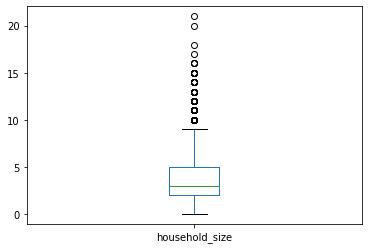

In [ ]:
Financial_df.boxplot(column =['household_size'], grid = False)

In [ ]:
Financial_df.columns

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

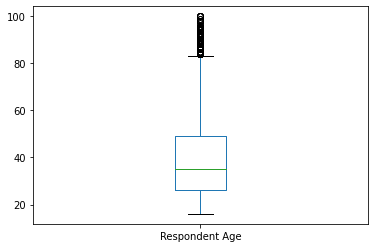

In [ ]:
Financial_df.boxplot(column =['Respondent Age'], grid = False)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


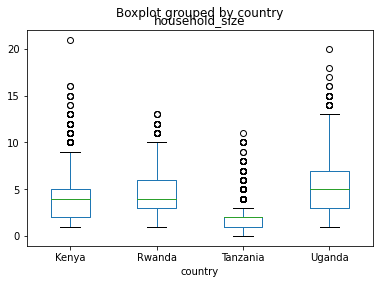

In [ ]:
#Household size Outliers by country

Financial_df.boxplot(column =['household_size'], by ='country', grid = False)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


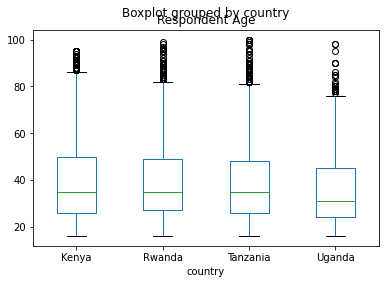

In [ ]:
# Respondent age Outliers by country

Financial_df.boxplot(column =['Respondent Age'], by ='country', grid = False)

In [ ]:
# Checking for Anomalies
Q1 = Financial_df.quantile(0.25)
Q3 = Financial_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

year               2.0
household_size     3.0
Respondent Age    23.0
dtype: float64


In [ ]:
# Dealing with outliers
# Removing outliers based on the IQR range and stores the result in the data frame 'df_out'

Financial_df_out = Financial_df[~((Financial_df < (Q1 - 1.5 * IQR)) | (Financial_df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Printing the shape of the new dataset

print(Financial_df_out.shape)

# Printing the shape of the old dataset

print(Financial_df.shape)

(22903, 13)
(23524, 13)


In [ ]:
Financial_df_out.shape

(22903, 13)

In [ ]:
Financial_df_out.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
FinancialDataset_df = Financial_df_out
FinancialDataset_df.head(2)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent


In [ ]:
# Identifying the Missing Data

FinancialDataset_df.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            27
Respondent Age            33
gender_of_respondent      33
The relathip with head     4
marital_status            31
Level of Educuation       29
Type of Job               30
dtype: int64

In [ ]:
# Dropping null values

FinancialDataset_df.dropna

<bound method DataFrame.dropna of       country  year  ...              Level of Educuation                Type of Job
0       Kenya  2018  ...              Secondary education              Self employed
1       Kenya  2018  ...              No formal education       Government Dependent
2       Kenya  2018  ...  Vocational/Specialised training              Self employed
3       Kenya  2018  ...                Primary education  Formally employed Private
4       Kenya  2018  ...                Primary education        Informally employed
...       ...   ...  ...                              ...                        ...
23518  Uganda  2018  ...                Primary education                  No Income
23519  Uganda  2018  ...              No formal education               Other Income
23520  Uganda  2018  ...              Secondary education               Other Income
23521  Uganda  2018  ...                Primary education               Other Income
23522  Uganda  2018  ...       

In [ ]:
# More data cleaning procedures

FinancialDataset_df.duplicated().values.any()

False

In [ ]:
FinancialDataset_df.columns

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

In [ ]:
# Dropping columns we may not need

FinancialDataset_df.drop(['uniqueid', 'The relathip with head'], axis = 1)

,country,year,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...
23518,Uganda,2018,No,Rural,Yes,NaN,20.0,Female,Single/Never Married,Primary education,No Income
23519,Uganda,2018,No,Rural,Yes,4.0,48.0,Female,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,No,Rural,Yes,2.0,27.0,Female,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,No,Rural,Yes,5.0,27.0,Female,Widowed,Primary education,Other Income


In [ ]:
#Grouping and perform count over each group

FinancialDataset_df =  FinancialDataset_df.groupby('country')['country'].count()
print(FinancialDataset_df)

# Rwanda provides the highest number of entries while Uganda provides the least

country
Kenya       5871
Rwanda      8562
Tanzania    6529
Uganda      1927
Name: country, dtype: int64

### Univariate Analysis

Household size

In [ ]:
# Mean household size
FinancialDataset_df["household_size"].mean()

3.573395698548697

In [ ]:
# Median household size

FinancialDataset_df["household_size"].median()

3.0

In [ ]:
# Mode

FinancialDataset_df["household_size"].mode()

0    2.0
dtype: float64

In [ ]:
# Standard Deviation 
FinancialDataset_df["household_size"].std()

2.07978318144993

In [ ]:
# Variance
FinancialDataset_df["household_size"].var()

4.325498081841992

In [ ]:
# Skewness
FinancialDataset_df["household_size"].skew()

0.6107328357162268

In [ ]:
# Kurtosis
FinancialDataset_df["household_size"].kurt()

-0.49930440433763623

In [ ]:
# Quantile
FinancialDataset_df["household_size"].quantile([0.25,0.5,0.75])

0.25    2.0
0.50    3.0
0.75    5.0
Name: household_size, dtype: float64

In [ ]:
FinancialDataset_df.columns

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

Respondent Age

In [1]:
# Mean
FinancialDataset_df["Respondent Age"].mean()

NameError: ignored

In [ ]:
# Median
FinancialDataset_df["Respondent Age"].median()

35.0

In [ ]:
# Mode
FinancialDataset_df["Respondent Age"].mode()

0    30.0
dtype: float64

In [ ]:
# Standrad Deviation
FinancialDataset_df["Respondent Age"].std()

15.804022763001404

In [ ]:
# Skewness
FinancialDataset_df["Respondent Age"].skew()

0.7409754960713362

In [ ]:
# Kurtosis
FinancialDataset_df["Respondent Age"].kurt()

-0.23634544791914935

In [ ]:
# Quantile
FinancialDataset_df["Respondent Age"].quantile([0.25,0.5,0.75])

0.25    26.0
0.50    35.0
0.75    48.0
Name: Respondent Age, dtype: float64

Univariate Analysis Visualization

('Respondent Ages per country', 'Age', 'Country')

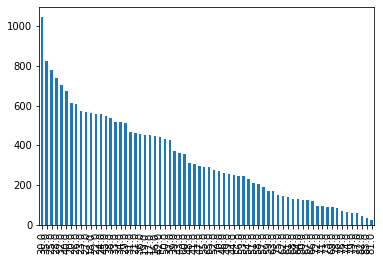

In [ ]:
FinancialDataset_df['Respondent Age'].value_counts().plot(kind = 'bar')
  # Chart elements
('Respondent Ages per country', 'Age', 'Country')

Gender of respondent

In [ ]:
# Assigning 1 to female and 0 to male in order to analyse this data

# using get dummies function in pandas

dummy = pd.get_dummies(FinancialDataset_df['gender_of_respondent'])


In [ ]:
dummy.head(3)

,Female,Male
0,1,0
1,1,0
2,0,1


In [ ]:
df2 = pd.concat((FinancialDataset_df, dummy), axis=1)

In [ ]:
df2.head(3)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job,Female,Male
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed,1,0
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent,1,0
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,0,1


In [ ]:
df2.drop(["gender_of_respondent"], axis=1)
df2.head(2)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job,Female,Male
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed,1,0
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent,1,0


In [ ]:
df2 = df2.drop(["Male"], axis=1)
df2.head(2)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job,Female
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed,1
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent,1


In [ ]:

df2 = df2.rename(columns = {'Female': 'Gender'}, inplace = False)

df2.head(3)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job,Gender
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed,1
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent,1
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,0


'Gender Representation'

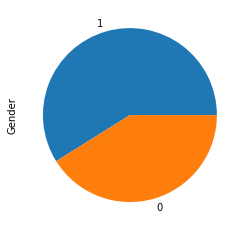

In [ ]:
df2['Gender'].value_counts().plot(kind = 'pie')
  # Chart elements
('Gender Representation')

# 1 = Female
# 0 = Males

# There's more females than males with Bank accounts


### Bivariate Analysis

In [ ]:

# Checking the columns 

df2.columns

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job', 'Gender'],
      dtype='object')

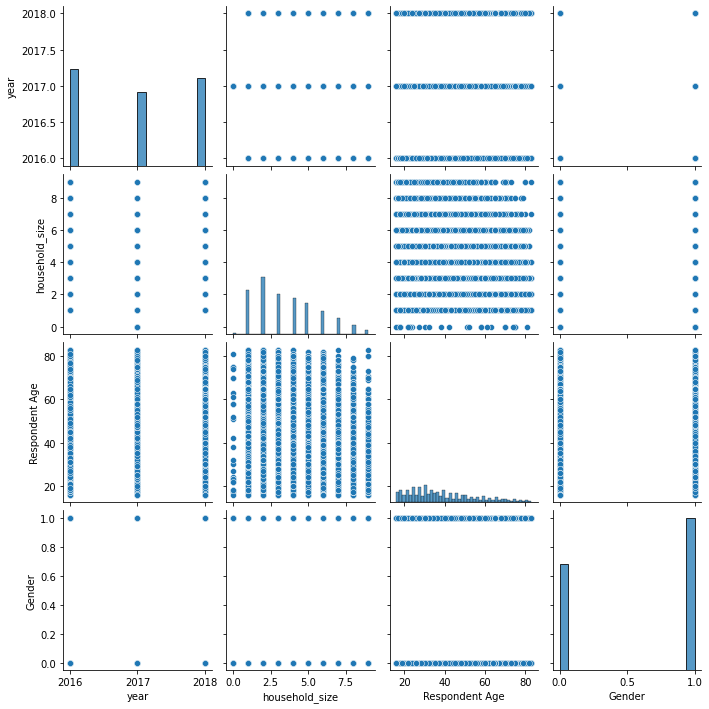

In [ ]:
# Ploting the bivariate summaries and recording the observations

sns.pairplot(df2)
plt.show()

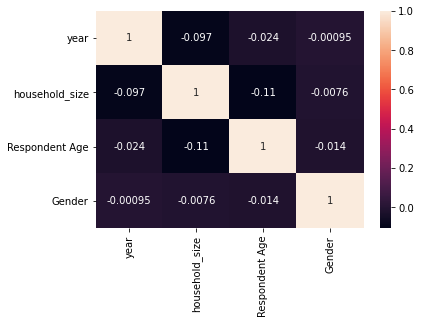

In [ ]:
sns.heatmap(df2.corr(),annot=True)
plt.show()

### Numerical and Numerical 


In [ ]:
# Scatter plot

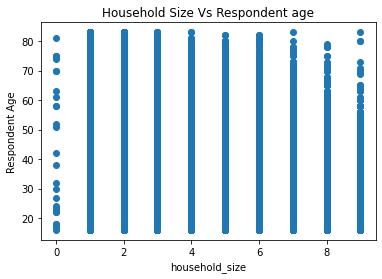

In [ ]:

# Previewing dataset
df2.head()

# Plotting our scatterplot
plt.scatter(df2['household_size'], df2['Respondent Age'])

# Giving our scatterplot a title
plt.title('Household Size Vs Respondent age')

# Labelling our x axis
plt.xlabel('household_size')

# Labelling our y axis
plt.ylabel('Respondent Age')

# Displaying our scatterplot
plt.show()

In [ ]:
df2.columns

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job', 'Gender'],
      dtype='object')

In [ ]:
# Assigning 1 to Yes and 0 to No for 'Has a  Back Account' column in order to analyse this data

# using get dummies function in pandas

dummy = pd.get_dummies(df2['Has a Bank account'])
dummy.head(3)
df = pd.concat((df2, dummy), axis=1)
df.head(3)



,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job,Gender,No,Yes
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed,1,0,1
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent,1,1,0
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,0,0,1


In [ ]:
df = df.drop(["Has a Bank account"], axis=1)
df

,country,year,uniqueid,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job,Gender,No,Yes
0,Kenya,2018,uniqueid_1,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed,1,0,1
1,Kenya,2018,uniqueid_2,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent,1,1,0
2,Kenya,2018,uniqueid_3,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,0,0,1
3,Kenya,2018,uniqueid_4,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private,1,1,0
4,Kenya,2018,uniqueid_5,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23518,Uganda,2018,uniqueid_2111,Rural,Yes,NaN,20.0,Female,Child,Single/Never Married,Primary education,No Income,1,1,0
23519,Uganda,2018,uniqueid_2113,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income,1,1,0
23520,Uganda,2018,uniqueid_2114,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income,1,1,0
23521,Uganda,2018,uniqueid_2115,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income,1,1,0


In [ ]:
df = df.drop(["No"], axis=1)
df.head(2)

,country,year,uniqueid,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job,Gender,Yes
0,Kenya,2018,uniqueid_1,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed,1,1
1,Kenya,2018,uniqueid_2,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent,1,0


In [ ]:

df = df.rename(columns = {'Yes': 'Has a Bank Account'}, inplace = False)

df

#1 = yes
#0 = No

,country,year,uniqueid,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job,Gender,Has a Bank Account
0,Kenya,2018,uniqueid_1,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed,1,1
1,Kenya,2018,uniqueid_2,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent,1,0
2,Kenya,2018,uniqueid_3,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,0,1
3,Kenya,2018,uniqueid_4,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private,1,0
4,Kenya,2018,uniqueid_5,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23518,Uganda,2018,uniqueid_2111,Rural,Yes,NaN,20.0,Female,Child,Single/Never Married,Primary education,No Income,1,0
23519,Uganda,2018,uniqueid_2113,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income,1,0
23520,Uganda,2018,uniqueid_2114,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income,1,0
23521,Uganda,2018,uniqueid_2115,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income,1,0


'Bank Account ownership'

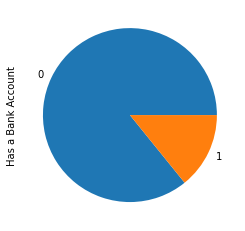

In [ ]:
# Pie chart to show % of population with or without a  bank account

df['Has a Bank Account'].value_counts().plot(kind = 'pie')
  # Chart elements
('Bank Account ownership')

# A larger % of the population has no bank accounts.

In [ ]:
# Age and Bank Account Scatter plot

In [ ]:
# Correlation

In [ ]:
# Calculating the pearson coefficient
pearson_coeff = df["Respondent Age"].corr(df["Has a Bank Account"], method="pearson") 
print(pearson_coeff)

# Checking whether you have to define the pearson
coeff = df["Respondent Age"].corr(df["Has a Bank Account"]) 
print(coeff)

# There is a weak positive correlation between the Respondent Age and Bank Account ownership

0.025563538078768048
0.025563538078768048


In [ ]:
# Calculating the pearson coefficient
pearson_coeff = df["household_size"].corr(df["Has a Bank Account"], method="pearson") 
print(pearson_coeff)

# Checking whether you have to define the pearson
coeff = df["household_size"].corr(df["Has a Bank Account"]) 
print(coeff)

# There is a negative weak correlation between the Household size and Bank Account ownership

-0.022238610962214155
-0.022238610962214155


### Categorical and Categorical

In [ ]:
# Stacked Columns

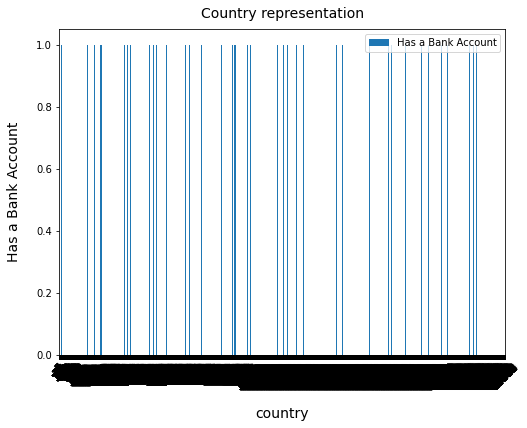

In [ ]:
df[['country', 'Has a Bank Account']].plot(kind='bar', figsize=(8, 6), stacked=True)

# Rotating our x axis ticks
plt.xticks(rotation = 45)

# Giving our chart a title
plt.title("Country representation", fontsize=14, y=1.015)

# Labeling our y axis
plt.ylabel("Has a Bank Account", fontsize=14, labelpad=15)

# Labeling our x axis
plt.xlabel("country", fontsize=14, labelpad=15)

# Displaying our chart
plt.show()

### Categorical and Numerical

In [ ]:
# Line Chart

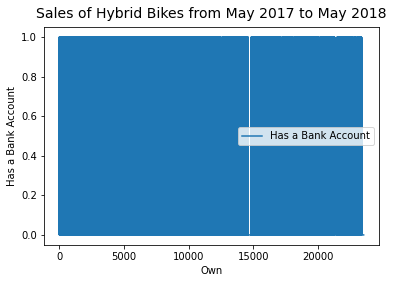

In [ ]:
# Plotting our line graph
df[["Has a Bank Account"]].plot()

# Giving a title to our line graph
plt.title("Sales of Hybrid Bikes from May 2017 to May 2018", fontsize=14, y=1.015)

# Labelling the y-axis
plt.ylabel('Has a Bank Account')

# Labelling the x-axis
plt.xlabel('Own')

# Displaying our graph
plt.show()

In [ ]:
# T-test

### Multivariate Analysis

In [ ]:
# Converting all the columns with string values to intergers/float for Multivariate analysis

# The columns are, Type of Location - Rural or Urban, Cell-phone Access

# Dropping the columns marital status, level of education and type of job for now. 

df_financial_dataset = df.drop(['marital_status', 'Level of Educuation', 'Type of Job'], axis = 1)

df_financial_dataset

KeyError: ignored

In [ ]:
# Converting type of location to 1 for Urban and 2 for Rural 

# Assigning 1 to Rural and 0 to Urban for 'Type of Location' column in order to analyse this data

# using get dummies function in pandas

dummy = pd.get_dummies(df_financial_dataset['Type of Location'])
dummy.head(3)
df = pd.concat((df_financial_dataset, dummy), axis=1)
df.head(3)


,country,year,Type of Location,Cell Phone Access,household_size,Respondent Age,Gender,Has a Bank Account,Rural,Urban
0,Kenya,2018,Rural,Yes,3.0,24.0,1,1,1,0
1,Kenya,2018,Rural,No,5.0,70.0,1,0,1,0
2,Kenya,2018,Urban,Yes,5.0,26.0,0,1,0,1


In [ ]:
df = df.drop(["Type of Location"], axis=1)
df

,country,year,Cell Phone Access,household_size,Respondent Age,Gender,Has a Bank Account,Rural,Urban
0,Kenya,2018,Yes,3.0,24.0,1,1,1,0
1,Kenya,2018,No,5.0,70.0,1,0,1,0
2,Kenya,2018,Yes,5.0,26.0,0,1,0,1
3,Kenya,2018,Yes,5.0,34.0,1,0,1,0
4,Kenya,2018,No,8.0,26.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
23518,Uganda,2018,Yes,NaN,20.0,1,0,1,0
23519,Uganda,2018,Yes,4.0,48.0,1,0,1,0
23520,Uganda,2018,Yes,2.0,27.0,1,0,1,0
23521,Uganda,2018,Yes,5.0,27.0,1,0,1,0


In [ ]:
df = df.drop(["Urban"], axis=1)
df.head(2)

,country,year,Cell Phone Access,household_size,Respondent Age,Gender,Has a Bank Account,Rural
0,Kenya,2018,Yes,3.0,24.0,1,1,1
1,Kenya,2018,No,5.0,70.0,1,0,1


In [ ]:

df = df.rename(columns = {'Rural': 'Urban/Rural'}, inplace = False)

df.head(2)

,country,year,Cell Phone Access,household_size,Respondent Age,Gender,Has a Bank Account,Urban/Rural
0,Kenya,2018,Yes,3.0,24.0,1,1,1
1,Kenya,2018,No,5.0,70.0,1,0,1


In [ ]:
# Assigning 1 and 0 to Cell phone access 


dummy = pd.get_dummies(df['Cell Phone Access'])
dummy.head(3)
df = pd.concat((df, dummy), axis=1)
df.head(3)


,country,year,Cell Phone Access,household_size,Respondent Age,Gender,Has a Bank Account,Urban/Rural,No,Yes
0,Kenya,2018,Yes,3.0,24.0,1,1,1,0,1
1,Kenya,2018,No,5.0,70.0,1,0,1,1,0
2,Kenya,2018,Yes,5.0,26.0,0,1,0,0,1


In [ ]:
df = df.drop(["Cell Phone Access"], axis=1)


In [ ]:
df = df.drop(["No"], axis=1)
df.head(2)

In [ ]:
df = df.rename(columns = {'Yes': 'Cell Phone Access'}, inplace = False)

df.head(2)

,country,year,household_size,Respondent Age,Gender,Has a Bank Account,Urban/Rural
0,Kenya,2018,3.0,24.0,1,1,1
1,Kenya,2018,5.0,70.0,1,0,1


In [ ]:
import pandas as pd

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)


df.head(2)

,country,year,household_size,Respondent Age,Gender,Has a Bank Account,Urban/Rural
0,Kenya,2018,3.0,24.0,1,1,1
1,Kenya,2018,5.0,70.0,1,0,1


In [ ]:
# Prinicipal Component Analysis

In [ ]:
# Step 1 

df = df.drop(['uniqueid', 'The relathip with head', 'gender_of_respondent'], axis = 1)


In [ ]:
# Step 2 
# Viewing dataset

sns.set_style()
df.head(3)

,country,year,household_size,Respondent Age,Gender,Has a Bank Account,Urban/Rural
0,Kenya,2018,3.0,24.0,1,1,1
1,Kenya,2018,5.0,70.0,1,0,1
2,Kenya,2018,5.0,26.0,0,1,0


In [ ]:
df.dropna()

,country,year,household_size,Respondent Age,Gender,Has a Bank Account,Urban/Rural
0,Kenya,2018,3.0,24.0,1,1,1
1,Kenya,2018,5.0,70.0,1,0,1
2,Kenya,2018,5.0,26.0,0,1,0
3,Kenya,2018,5.0,34.0,1,0,1
4,Kenya,2018,8.0,26.0,0,0,0
...,...,...,...,...,...,...,...
23512,Uganda,2018,2.0,57.0,1,0,1
23519,Uganda,2018,4.0,48.0,1,0,1
23520,Uganda,2018,2.0,27.0,1,0,1
23521,Uganda,2018,5.0,27.0,1,0,1


In [ ]:
# Step 3 - Preprocessing 

X = df.drop('country', 1)
y = df['country']
# X - feature set 
# y - corresponding labels

In [ ]:
X

,year,household_size,Respondent Age,Gender,Has a Bank Account,Urban/Rural
0,2018,3.0,24.0,1,1,1
1,2018,5.0,70.0,1,0,1
2,2018,5.0,26.0,0,1,0
3,2018,5.0,34.0,1,0,1
4,2018,8.0,26.0,0,0,0
...,...,...,...,...,...,...
23518,2018,NaN,20.0,1,0,1
23519,2018,4.0,48.0,1,0,1
23520,2018,2.0,27.0,1,0,1
23521,2018,5.0,27.0,1,0,1


In [ ]:
y

0         Kenya
1         Kenya
2         Kenya
3         Kenya
4         Kenya
          ...  
23518    Uganda
23519    Uganda
23520    Uganda
23521    Uganda
23522    Uganda
Name: country, Length: 22903, dtype: object

In [ ]:
# Step 4: Splitting the dataset into the Training set and Test set
# The next preprocessing step is to divide data into training and test sets. 
# Script to do so:
#
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train

,year,household_size,Respondent Age,Gender,Has a Bank Account,Urban/Rural
2478,2018,3.0,24.0,1,1,1
11276,2016,4.0,23.0,0,0,1
2295,2018,6.0,58.0,0,0,1
18558,2017,2.0,35.0,1,0,0
2678,2018,1.0,55.0,0,0,1
...,...,...,...,...,...,...
13467,2016,3.0,NaN,0,0,1
20074,2017,3.0,39.0,1,0,1
10121,2016,5.0,16.0,1,0,1
11090,2016,4.0,25.0,0,0,1


In [ ]:
X_test

,year,household_size,Respondent Age,Gender,Has a Bank Account,Urban/Rural
23210,2018,9.0,34.0,1,1,1
5368,2018,3.0,16.0,1,0,0
18462,2017,2.0,45.0,0,0,0
15401,2017,1.0,43.0,0,0,0
8592,2016,3.0,27.0,0,0,1
...,...,...,...,...,...,...
8050,2016,3.0,40.0,0,0,1
13069,2016,6.0,50.0,1,0,1
12163,2016,5.0,32.0,1,0,1
2235,2018,4.0,55.0,0,0,1


In [ ]:
X_train.dropna

<bound method DataFrame.dropna of        year  household_size  ...  Has a Bank Account  Urban/Rural
2478   2018             3.0  ...                   1            1
11276  2016             4.0  ...                   0            1
2295   2018             6.0  ...                   0            1
18558  2017             2.0  ...                   0            0
2678   2018             1.0  ...                   0            1
...     ...             ...  ...                 ...          ...
13467  2016             3.0  ...                   0            1
20074  2017             3.0  ...                   0            1
10121  2016             5.0  ...                   0            1
11090  2016             4.0  ...                   0            1
2831   2018             6.0  ...                   0            1

[18322 rows x 6 columns]>

In [ ]:
X_test.dropna

<bound method DataFrame.dropna of        year  household_size  ...  Has a Bank Account  Urban/Rural
23210  2018             9.0  ...                   1            1
5368   2018             3.0  ...                   0            0
18462  2017             2.0  ...                   0            0
15401  2017             1.0  ...                   0            0
8592   2016             3.0  ...                   0            1
...     ...             ...  ...                 ...          ...
8050   2016             3.0  ...                   0            1
13069  2016             6.0  ...                   0            1
12163  2016             5.0  ...                   0            1
2235   2018             4.0  ...                   0            1
17402  2017             2.0  ...                   0            0

[4581 rows x 6 columns]>

In [ ]:
print(X_train.shape)
print(X_test.shape)

(18322, 6)
(4581, 6)


In [ ]:
# Step 5: Normalization
# PCA performs best with a normalized feature set. 
# The standard scalar normalization is performed to normalize the feature set. 
# creating an object then using it to train and test


from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train

array([[ 1.2204203 , -0.27831574, -0.908188  ,  0.83719245,  2.45684723,
         0.80311836],
       [-1.14577449,  0.20215369, -0.97145241, -1.19446849, -0.40702571,
         0.80311836],
       [ 1.2204203 ,  1.16309255,  1.24280196, -1.19446849, -0.40702571,
         0.80311836],
       ...,
       [-1.14577449,  0.68262312, -1.41430329,  0.83719245, -0.40702571,
         0.80311836],
       [-1.14577449,  0.20215369, -0.84492359, -1.19446849, -0.40702571,
         0.80311836],
       [ 1.2204203 ,  1.16309255, -0.52860154,  0.83719245, -0.40702571,
         0.80311836]])

In [ ]:
X_test

array([[ 1.2204203 ,  2.60450084, -0.27554389,  0.83719245,  2.45684723,
         0.80311836],
       [ 1.2204203 , -0.27831574, -1.41430329,  0.83719245, -0.40702571,
        -1.24514648],
       [ 0.03732291, -0.75878518,  0.42036462, -1.19446849, -0.40702571,
        -1.24514648],
       ...,
       [-1.14577449,  0.68262312, -0.40207272,  0.83719245, -0.40702571,
         0.80311836],
       [ 1.2204203 ,  0.20215369,  1.05300873, -1.19446849, -0.40702571,
         0.80311836],
       [ 0.03732291, -0.75878518, -0.78165918, -1.19446849, -0.40702571,
        -1.24514648]])

In [ ]:
X.dtypes

year                    int64
household_size        float64
Respondent Age        float64
Gender                  uint8
Has a Bank Account      uint8
Urban/Rural             uint8
dtype: object

In [ ]:
# Step 6: Applying PCA
# It is only a matter of three lines of code to perform PCA using Python's Scikit-Learn library. 
# The PCA class is used for this purpose. PCA depends only upon the feature set and not the label data. 
# Therefore, PCA can be considered as an unsupervised machine learning technique.
# Performing PCA using Scikit-Learn is a two-step process:
# Initialize the PCA class by passing the number of components to the constructor.
# Call the fit and then transform methods by passing the feature set to these methods. 
# The transform method returns the specified number of principal components.
# Let's take a look at the following code. In the code above, we create a PCA object named pca. 
# We did not specify the number of components in the constructor. 
# Hence, all four of the features in the feature set will be returned for both the training and test sets.
# 
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

ValueError: ignored

In [ ]:
# Factor Analysis

In [ ]:
!pip install factor_analyzer==0.2.3

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value


(4370.263295487126, 0.0)

In [ ]:
# KMO

from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all,kmo_model=calculate_kmo(df)

kmo_all,kmo_model

# The overall KMO for our data is 0.84, which is excellent. 
# This value indicates that you can proceed with your planned factor analysis.

ValueError: ignored

In [ ]:
# Choosing the Number of Factors
# For choosing the number of factors, you can use the Kaiser criterion and scree plot. Both are based on eigenvalues.
# 
from factor_analyzer.factor_analyzer import FactorAnalyzer

# Creating factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.analyze(df, 25, rotation=None)

# Checking the Eigenvalues
ev, v = fa.get_eigenvalues()
ev

# Here, we can see only for 6-factors eigenvalues are greater than one. 
# It means we need to choose only 6 factors (or unobserved variables).

ValueError: ignored

In [ ]:
# Linear Discriminant Analysis

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df.head()

,country,year,household_size,Respondent Age,Gender,Has a Bank Account,Urban/Rural
0,Kenya,2018,3.0,24.0,1,1,1
1,Kenya,2018,5.0,70.0,1,0,1
2,Kenya,2018,5.0,26.0,0,1,0
3,Kenya,2018,5.0,34.0,1,0,1
4,Kenya,2018,8.0,26.0,0,0,0


In [ ]:
df.shape

(203, 7)

In [ ]:
df.drop(df.tail(100).index,inplace=True) # drop last n rows

In [ ]:
df.shape

(103, 7)

In [ ]:
X = df.iloc[:, 1:6].values
y = df.iloc[:, 0].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train

array([[2.018e+03, 3.000e+00, 2.100e+01, 1.000e+00, 0.000e+00],
       [2.018e+03, 5.000e+00, 3.400e+01, 1.000e+00, 0.000e+00],
       [2.018e+03, 4.000e+00, 3.400e+01, 0.000e+00, 0.000e+00],
       [2.018e+03, 4.000e+00, 2.700e+01, 1.000e+00, 0.000e+00],
       [2.018e+03, 4.000e+00, 1.700e+01, 0.000e+00, 0.000e+00],
       [2.018e+03, 7.000e+00, 3.200e+01, 1.000e+00, 0.000e+00],
       [2.018e+03, 3.000e+00, 2.900e+01, 1.000e+00, 0.000e+00],
       [2.018e+03, 5.000e+00, 4.200e+01, 0.000e+00, 1.000e+00],
       [2.018e+03, 8.000e+00, 4.000e+01, 1.000e+00, 0.000e+00],
       [2.018e+03, 6.000e+00, 2.500e+01, 0.000e+00, 0.000e+00],
       [2.018e+03, 3.000e+00, 3.400e+01, 1.000e+00, 0.000e+00],
       [2.018e+03, 6.000e+00, 4.000e+01, 0.000e+00, 0.000e+00],
       [2.018e+03, 2.000e+00, 2.200e+01, 0.000e+00, 0.000e+00],
       [2.018e+03, 1.000e+00, 2.500e+01, 1.000e+00, 1.000e+00],
       [2.018e+03, 1.000e+00, 3.100e+01, 1.000e+00, 0.000e+00],
       [2.018e+03, 1.000e+00, 4.800e+01,

In [ ]:
# Feature scaling
# We now need to perform feature scaling. We execute the following code to do so:
# 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Peforming LDA
# It requires only four lines of code to perform LDA with Scikit-Learn. 
# The LinearDiscriminantAnalysis class of the sklearn.discriminant_analysis 
# library can be used to Perform LDA in Python. 
# Let's take a look at the following code
#

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(5, 1 - 1) = 0 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:399: RuntimeWarning: invalid value encountered in true_divide
  S**2))[:self._max_components]
